# 17K-Mobile-Strategy-Games, prediction of the user rating based on the first letter of the game name

This is the data of 17007 strategy games on the Apple App Store

Dataset: https://www.kaggle.com/datasets/tristan581/17k-apple-app-store-strategy-games/

Kaggle: https://www.kaggle.com/code/alperugurca/first-letter



# 1.Importing the libraries and the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, silhouette_score, r2_score


In [4]:
df = pd.read_csv("appstore_games.csv")

# 2.Exploratory Data Analysis


In [5]:
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

3.Data Preprocessing

In [7]:
df = df[["Name", "Average User Rating"]]

In [8]:
df.dropna(inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7561 entries, 0 to 16993
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 7561 non-null   object 
 1   Average User Rating  7561 non-null   float64
dtypes: float64(1), object(1)
memory usage: 177.2+ KB


In [10]:
df["First Letter"] = df["Name"].str[0]
df.drop(columns=["Name"], inplace=True)

<Axes: xlabel='First Letter'>

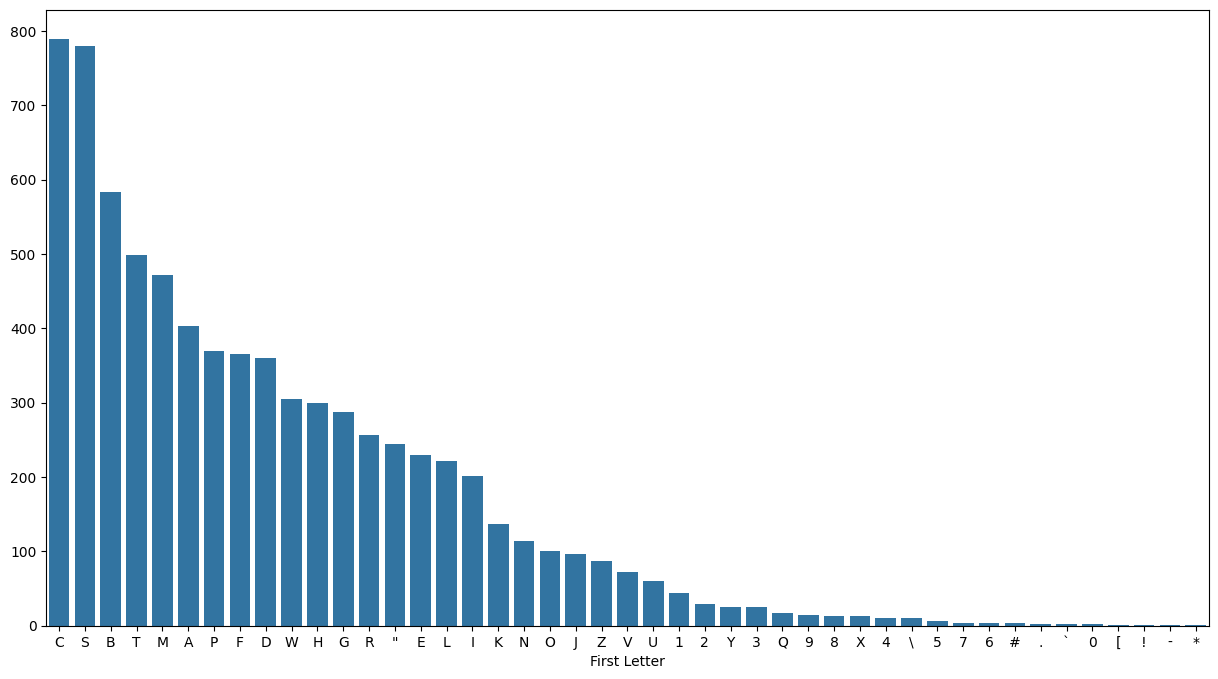

In [11]:
letter_counts = df["First Letter"].value_counts()
plt.figure(figsize=(15, 8))
sns.barplot(x=letter_counts.index, y=letter_counts.values)

In [12]:
df = df[df["First Letter"].groupby(df["First Letter"]).transform('count') >= 5]

<Axes: xlabel='First Letter'>

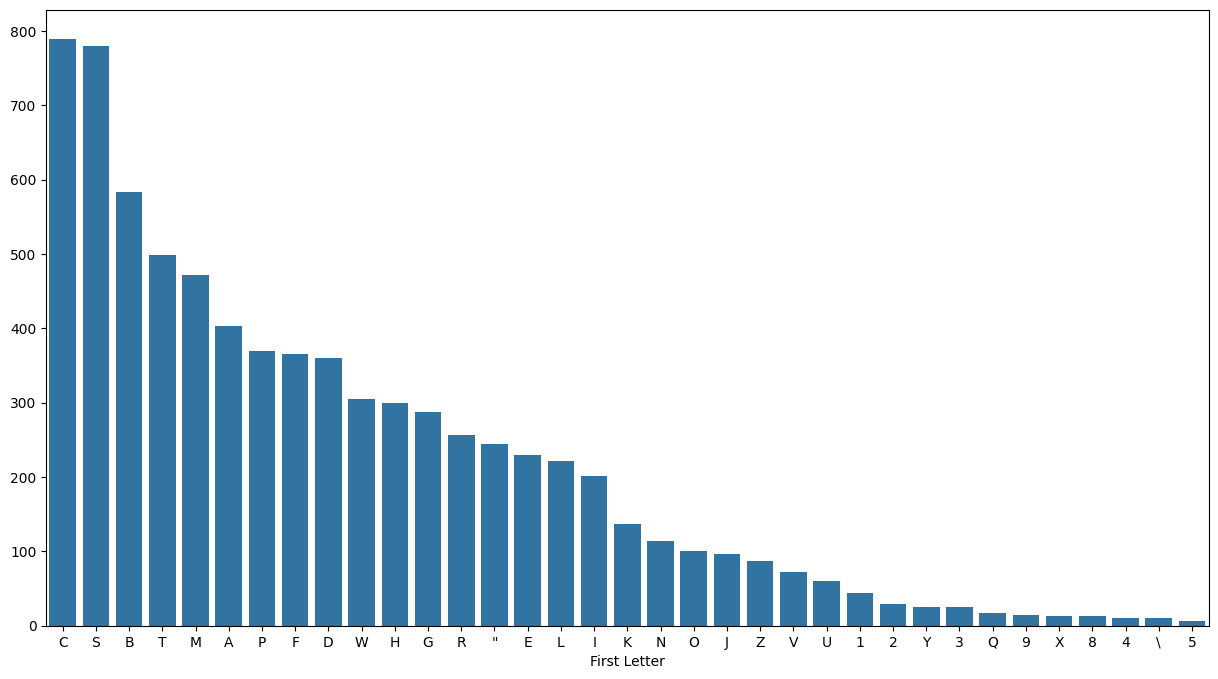

In [13]:
letter_counts = df["First Letter"].value_counts()
plt.figure(figsize=(15, 8))
sns.barplot(x=letter_counts.index, y=letter_counts.values)

4. Linear Regression Model


In [14]:
X = df[["First Letter"]]
y = df[["Average User Rating"]]
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.5792765826461169
Root Mean Squared Error: 0.7611022156360583
Mean Absolute Error: 0.5829433775074602
R2 Score: 0.002700268560941521


5. Supervised Learning Models

In [19]:

X = df[["First Letter"]]
y = df["Average User Rating"].values.ravel()  # Change this line
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

def train_and_evaluate_ml_models(X_train, X_test, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'SVR': SVR(),
        'KNN': KNeighborsRegressor()
    }
    
    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2
        }
    
    return results

# ... rest of the code ...

# Use the function
ml_model_results = train_and_evaluate_ml_models(X_train, X_test, y_train, y_test)

# Print results
print("\nModel Results:")
print("-" * 80)
print(f"{'Model':<20} {'MSE':>10} {'RMSE':>10} {'MAE':>10} {'R2':>10}")
print("-" * 80)

# Sort the results by R2 score in descending order
sorted_results = sorted(ml_model_results.items(), key=lambda x: x[1]['R2'], reverse=True)

for model, metrics in sorted_results:
    print(f"{model:<20} {metrics['MSE']:10.4f} {metrics['RMSE']:10.4f} {metrics['MAE']:10.4f} {metrics['R2']:10.4f}")
print("-" * 80)


Model Results:
--------------------------------------------------------------------------------
Model                       MSE       RMSE        MAE         R2
--------------------------------------------------------------------------------
Random Forest            0.5789     0.7609     0.5825     0.0034
Ridge Regression         0.5792     0.7610     0.5828     0.0029
Linear Regression        0.5793     0.7611     0.5829     0.0027
Decision Tree            0.5794     0.7612     0.5830     0.0026
Gradient Boosting        0.5799     0.7615     0.5833     0.0016
Lasso Regression         0.5830     0.7635     0.5851    -0.0036
SVR                      0.6724     0.8200     0.5879    -0.1575
KNN                      0.7155     0.8459     0.6342    -0.2318
--------------------------------------------------------------------------------


6. Unsupervised Learning Models

In [25]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
import numpy as np

def train_and_evaluate_unsupervised_models(X):
    # Prepare the preprocessing steps
    categorical_features = ['First Letter']
    numeric_features = ['Average User Rating']

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
        ])

    # Fit and transform the data
    X_processed = preprocessor.fit_transform(X)
    
    models = {
        'K-Means': KMeans(n_clusters=5, random_state=42),
        'Hierarchical Clustering': AgglomerativeClustering(n_clusters=5),
        'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
        'Gaussian Mixture Model': GaussianMixture(n_components=5, random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        model.fit(X_processed)
        if name == 'Gaussian Mixture Model':
            labels = model.predict(X_processed)
        elif name != 'DBSCAN':
            labels = model.labels_
        else:
            labels = model.labels_
        
        # DBSCAN may have noise points (label -1), exclude these for silhouette score
        if len(set(labels)) > 1:
            silhouette = silhouette_score(X_processed, labels)
            results[name] = {'Silhouette Score': silhouette}
        else:
            results[name] = {'Silhouette Score': 'N/A (only one label)'}
    
    return results

# Use the function
X = df[["First Letter", "Average User Rating"]]
unsupervised_model_results = train_and_evaluate_unsupervised_models(X)

# Print results
print("\nUnsupervised Model Results:")
print("-" * 80)
for model, metrics in unsupervised_model_results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        if isinstance(value, float):
            print(f"{metric}: {value:.4f}")
        else:
            print(f"{metric}: {value}")
print("-" * 80)


Unsupervised Model Results:
--------------------------------------------------------------------------------

K-Means:
Silhouette Score: 0.1536

Hierarchical Clustering:
Silhouette Score: 0.1398

DBSCAN:
Silhouette Score: 0.9609

Gaussian Mixture Model:
Silhouette Score: 0.0857
--------------------------------------------------------------------------------


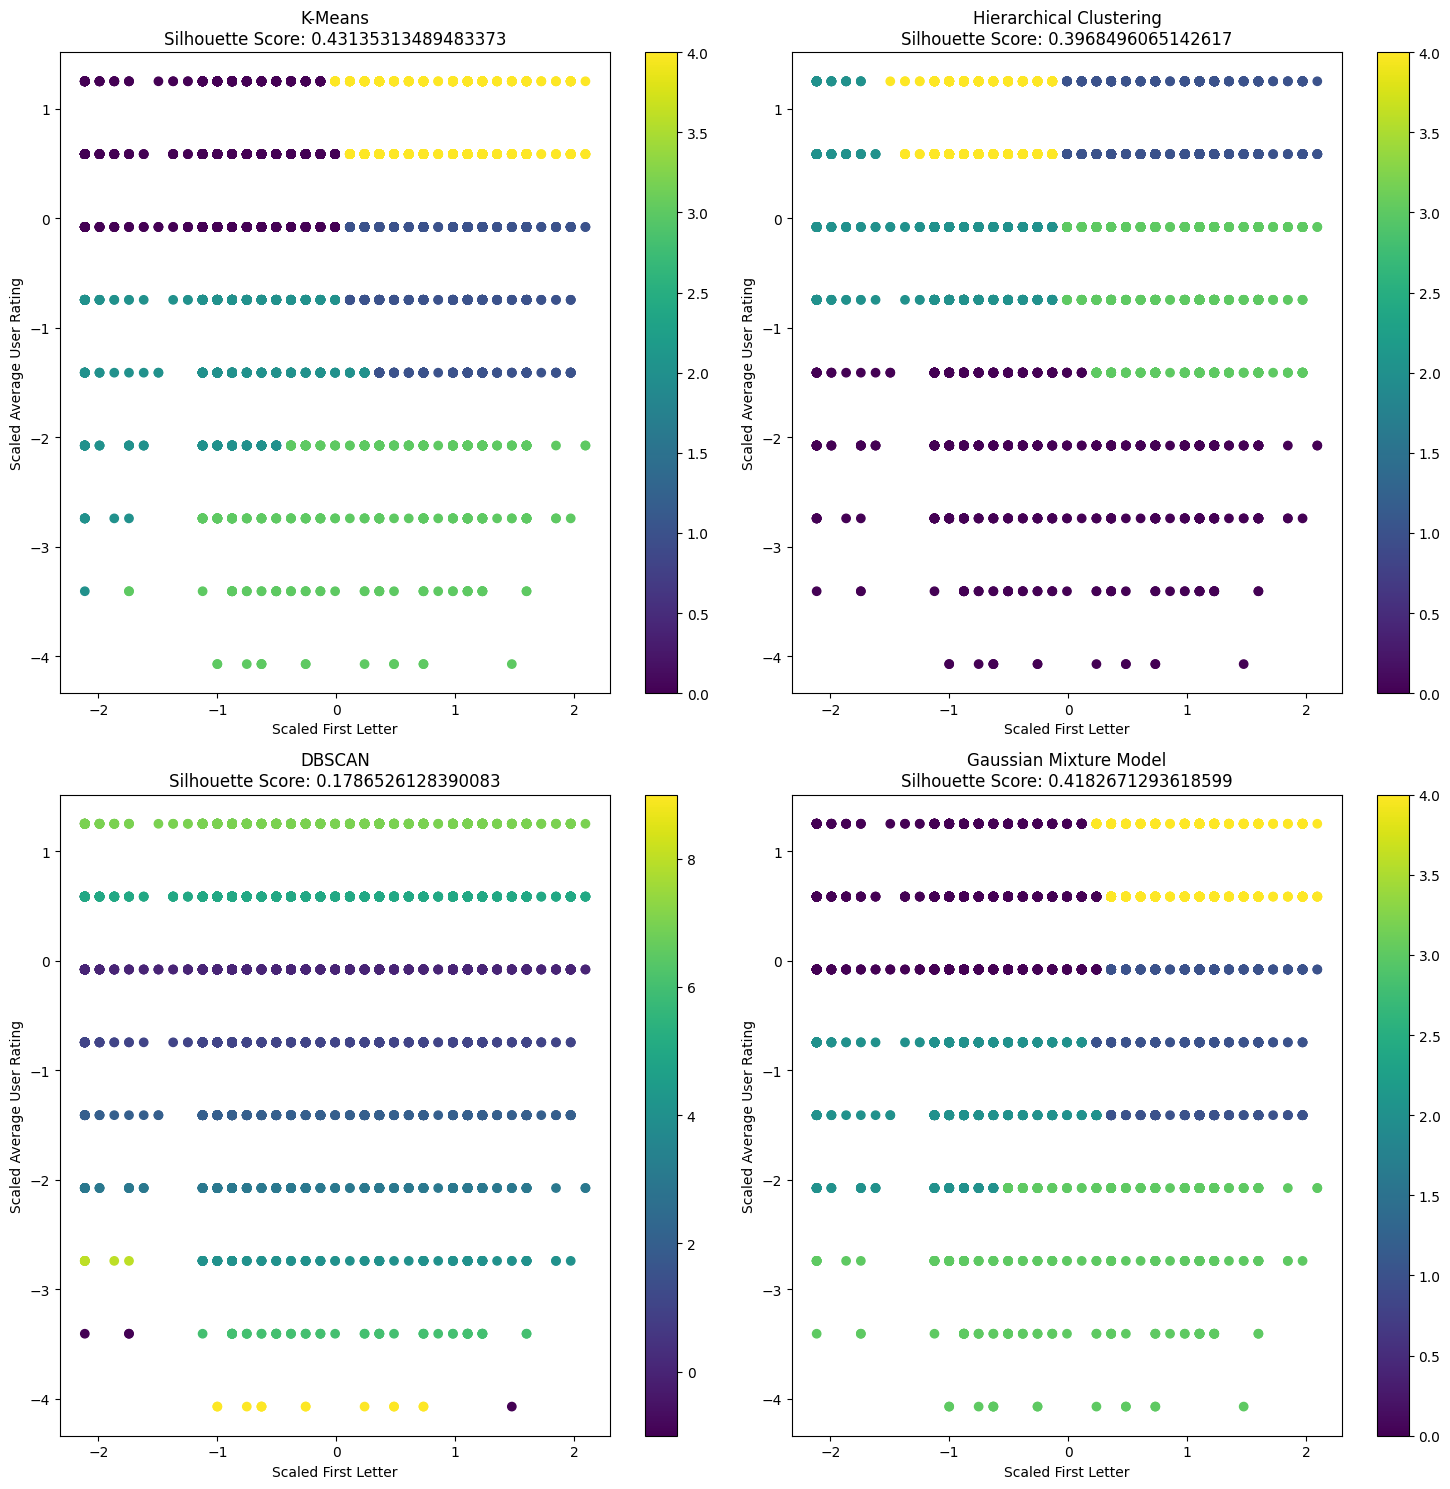


Unsupervised Model Results:
--------------------------------------------------------------------------------

K-Means:
Silhouette Score: 0.4314

Hierarchical Clustering:
Silhouette Score: 0.3968

DBSCAN:
Silhouette Score: 0.1787

Gaussian Mixture Model:
Silhouette Score: 0.4183
--------------------------------------------------------------------------------


In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
import numpy as np

def train_evaluate_and_visualize_unsupervised_models(X):
    # Prepare the data
    le = LabelEncoder()
    X_encoded = X.copy()
    X_encoded['First Letter'] = le.fit_transform(X['First Letter'])
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_encoded)
    
    models = {
        'K-Means': KMeans(n_clusters=5, random_state=42),
        'Hierarchical Clustering': AgglomerativeClustering(n_clusters=5),
        'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
        'Gaussian Mixture Model': GaussianMixture(n_components=5, random_state=42)
    }
    
    results = {}
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    axs = axs.ravel()
    
    for i, (name, model) in enumerate(models.items()):
        model.fit(X_scaled)
        if name == 'Gaussian Mixture Model':
            labels = model.predict(X_scaled)
        else:
            labels = model.labels_
        
        if len(set(labels)) > 1:
            silhouette = silhouette_score(X_scaled, labels)
            results[name] = {'Silhouette Score': silhouette}
        else:
            results[name] = {'Silhouette Score': 'N/A (only one label)'}
        
        # Plotting
        scatter = axs[i].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
        axs[i].set_title(f'{name}\nSilhouette Score: {results[name]["Silhouette Score"]}')
        axs[i].set_xlabel('Scaled First Letter')
        axs[i].set_ylabel('Scaled Average User Rating')
        plt.colorbar(scatter, ax=axs[i])
    
    plt.tight_layout()
    plt.show()
    
    return results

# Use the function
X = df[["First Letter", "Average User Rating"]]
unsupervised_model_results = train_evaluate_and_visualize_unsupervised_models(X)

# Print results
print("\nUnsupervised Model Results:")
print("-" * 80)
for model, metrics in unsupervised_model_results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        if isinstance(value, float):
            print(f"{metric}: {value:.4f}")
        else:
            print(f"{metric}: {value}")
print("-" * 80)